In [2]:
import pandas as pd
train = pd.read_csv("../inputs/train.tsv",sep='\t')
test = pd.read_csv("../inputs/vali.tsv",sep='\t')

# 单词数

In [3]:
from collections import Counter
wordCounter = Counter()
train['内容'].apply(lambda x: wordCounter.update(str(x).split()))
test['内容'].apply(lambda x: wordCounter.update(str(x).split()))

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
58537    None
58538    None
58539    None
58540    None
58541    None
58542    None
58543    None
58544    None
58545    None
58546    None
58547    None
58548    None
58549    None
58550    None
58551    None
58552    None
58553    None
58554    None
58555    None
58556    None
58557    None
58558    None
58559    None
58560    None
58561    None
58562    None
58563    None
58564    None
58565    None
58566    None
Name: 内容, Length: 58567, dtype: object

In [6]:
wordCounter.most_common(20)

[('，', 4679224),
 ('的', 2400395),
 ('。', 1889606),
 ('、', 1867149),
 (':', 1021983),
 (',', 879686),
 ('在', 681912),
 ('了', 512101),
 ('和', 470296),
 ('“', 469380),
 ('：', 450689),
 ('”', 446593),
 ('路', 391730),
 ('是', 390770),
 ('等', 388436),
 ('）', 383359),
 ('（', 381574),
 ('年', 340748),
 ('有', 299865),
 ('配套', 294643)]

In [7]:
wordCounter.most_common()[:-19:-1] 

[('20906', 1),
 ('6505', 1),
 ('21626', 1),
 ('28131', 1),
 ('29155', 1),
 ('而嘉实', 1),
 ('24.91%', 1),
 ('60.34%', 1),
 ('正到', 1),
 ('亿康美', 1),
 ('银腾', 1),
 ('5516000', 1),
 ('但康美', 1),
 ('代斯队', 1),
 ('特特朗特', 1),
 ('Brolly', 1),
 ('传马云', 1),
 ('慢遭', 1)]

# 长度特征

In [9]:
train['num_words'] = train.内容.str.count('\S+')

In [10]:
train['num_sents'] = train.内容.str.count('[。！？]')

In [14]:
import numpy as np
import re
train["内容"] = train["内容"].fillna("无")
train['str_len'] = train.内容.apply(lambda x: np.sum([len(w) for w in str(x).split()]))
train['mean_word_len'] = train.内容.apply(lambda x: np.mean([len(w) for w in str(x).split()]))
train['chinese_word_count'] = train['内容'].apply(lambda comment: sum(1 for c in comment.split() if
                                                       re.fullmatch(r'[\u4e00-\u9fff]+', c)))
train['num_unique_words'] = train['内容'].apply(lambda comment: len(set(w for w in comment.split())))
train['words_vs_unique'] = train['num_unique_words'] / train['num_words']
train['chi_word_rate'] = train.apply(lambda row: float(row['chinese_word_count']) / float(row['num_words']),
                               axis=1)

In [19]:
train['chinese_word_count'] = train['内容'].apply(lambda comment: sum(1 for c in comment.split() if
                                                       re.fullmatch(r'[\u4e00-\u9fff]+', c)))

In [23]:
train['chi_word_rate'] = train.apply(lambda row: float(row['chinese_word_count']) / float(row['num_words']),
                               axis=1)

In [24]:
for g_name, group in train.groupby('标签'):
    print(g_name)
    print(group.median())

人类作者
id                    68162.000000
num_words               270.000000
num_sents                 9.000000
str_len                 472.000000
mean_word_len             1.736031
chinese_word_count      213.000000
num_unique_words        156.000000
words_vs_unique           0.584270
chi_word_rate             0.800654
dtype: float64
机器作者
id                    72872.000000
num_words               733.000000
num_sents                 8.000000
str_len                1258.000000
mean_word_len             1.737346
chinese_word_count      512.000000
num_unique_words        271.000000
words_vs_unique           0.371290
chi_word_rate             0.676435
dtype: float64
机器翻译
id                    73092.500000
num_words               216.000000
num_sents                 9.000000
str_len                 381.000000
mean_word_len             1.779412
chinese_word_count      176.000000
num_unique_words        135.000000
words_vs_unique           0.623894
chi_word_rate             0.813853
dtype: flo

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [31]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/xiaqiang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

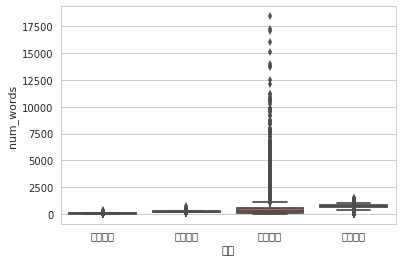

In [32]:
sns.boxplot(x="标签", y="num_words", data=train);

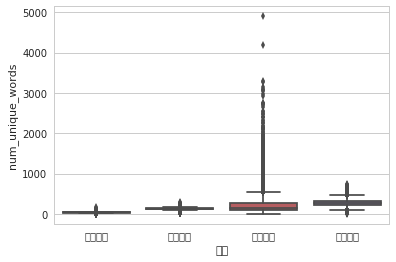

In [28]:
sns.boxplot(x="标签", y="num_unique_words", data=train);

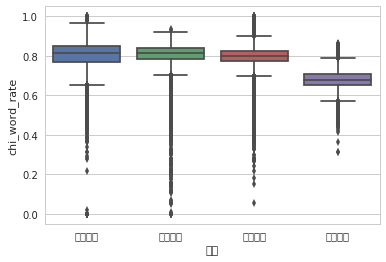

In [29]:
sns.boxplot(x="标签", y="chi_word_rate", data=train);

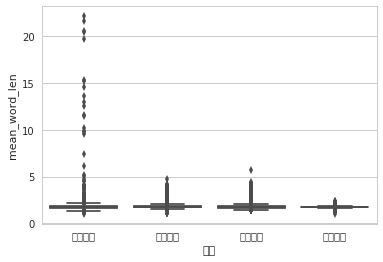

In [30]:
sns.boxplot(x="标签", y="mean_word_len", data=train);